In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [51]:
url = 'newdata.csv'

In [52]:
df = pd.read_csv(url) 

In [53]:
df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,37029883876,39232435784,42161481858,48421923459,56480289941,59554854576,45865462034,50134942204,53085455871,58447995017,...,1.830000e+12,1.860000e+12,2.040000e+12,2.100000e+12,2.290000e+12,2.650000e+12,2.700000e+12,2.830000e+12,2.670000e+12,3.180000e+12


In [54]:
# india_gdp = df[df['Country Name'] == 'India']

In [55]:
# india_gdp = india_gdp.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=1)
# india_gdp = india_gdp.rename(columns={'Unnamed: 66': 'Year'})

In [56]:
india_gdp = df

In [57]:
print(india_gdp.columns)

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')


In [203]:
# india_gdp = india_gdp.reset_index()

# india_gdp = india_gdp.set_index('Year')
# india_gdp.index = pd.to_datetime(india_gdp.index, format='%Y')

In [204]:
india_gdp = india_gdp.reset_index()

In [205]:
# india_gdp = india_gdp.rename(columns={'Unnamed: 64': 'Year'})

In [206]:
# india_gdp['Year'] = pd.to_datetime(india_gdp['Year'], format='%Y')

KeyError: 'Year'

In [207]:
# india_gdp = india_gdp.set_index('Year')

KeyError: "None of ['Year'] are in the columns"

In [208]:
india_gdp

,index,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,109,3.702988e+10,3.923244e+10,4.216148e+10,4.842192e+10,5.648029e+10,5.955485e+10,4.586546e+10,5.013494e+10,5.308546e+10,...,1.856722e+12,2.039127e+12,2.103588e+12,2.294798e+12,2.651473e+12,2.702930e+12,2.831552e+12,2.667688e+12,3.176295e+12,NaN


Python that can be used for time series forecasting. Here are a few popular ones:

ARIMA (Autoregressive Integrated Moving Average): This is a popular time series model that can be used to model non-stationary time series data. The statsmodels library in Python provides an implementation of ARIMA.

SARIMA (Seasonal Autoregressive Integrated Moving Average): This is an extension of ARIMA that can handle seasonality in the data. The statsmodels library also provides an implementation of SARIMA.

VAR (Vector Autoregression): This is a multivariate time series model that can be used when you have multiple time series that are interdependent. The statsmodels library provides an implementation of VAR.

LSTM (Long Short-Term Memory): This is a type of neural network that is commonly used for time series prediction. The Keras library provides an implementation of LSTM.


# predict India's GDP

In [89]:
# Install the fbprophet library
!pip install fbprophet

^C


In [110]:
from fbprophet import Prophet

india_gdp_prophet = pd.DataFrame({'ds': india_gdp.index, 'y': india_gdp['Value']})

ModuleNotFoundError: No module named 'fbprophet'

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
X = india_gdp.columns
y = [0] * len(X)
for i in range(len(X)):
    y[i] = india_gdp[X[i]]

In [62]:
X

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [63]:
y

[0    37029883876
 Name: 1960, dtype: int64,
 0    39232435784
 Name: 1961, dtype: int64,
 0    42161481858
 Name: 1962, dtype: int64,
 0    48421923459
 Name: 1963, dtype: int64,
 0    56480289941
 Name: 1964, dtype: int64,
 0    59554854576
 Name: 1965, dtype: int64,
 0    45865462034
 Name: 1966, dtype: int64,
 0    50134942204
 Name: 1967, dtype: int64,
 0    53085455871
 Name: 1968, dtype: int64,
 0    58447995017
 Name: 1969, dtype: int64,
 0    62422483055
 Name: 1970, dtype: int64,
 0    67350988021
 Name: 1971, dtype: int64,
 0    71463193831
 Name: 1972, dtype: int64,
 0    85515269585
 Name: 1973, dtype: int64,
 0    99525899116
 Name: 1974, dtype: int64,
 0    98472796457
 Name: 1975, dtype: int64,
 0    1.030000e+11
 Name: 1976, dtype: float64,
 0    1.210000e+11
 Name: 1977, dtype: float64,
 0    1.370000e+11
 Name: 1978, dtype: float64,
 0    1.530000e+11
 Name: 1979, dtype: float64,
 0    1.860000e+11
 Name: 1980, dtype: float64,
 0    1.930000e+11
 Name: 1981, dtype: f

In [65]:
len(X), len(y)

(62, 62)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# X = india_gdp.columns[1:].astype(int).values.reshape(-1, 1)
# y = india_gdp.iloc[1].values.reshape(-1, 1)

In [69]:
# Fit a linear regression model to the training data
reg = LinearRegression()
reg.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [82]:
print(X_test)
print(X_test.values.reshape(-1,1))
print(reg.score(X_test.values.reshape(-1,1), y_test))

Index(['2010', '2016', '1960', '2017', '1965', '2008', '1976', '1972', '1985',
       '2019', '1990', '1969', '2007'],
      dtype='object')
[['2010']
 ['2016']
 ['1960']
 ['2017']
 ['1965']
 ['2008']
 ['1976']
 ['1972']
 ['1985']
 ['2019']
 ['1990']
 ['1969']
 ['2007']]
0.7507435103418861


In [88]:
y_pred = reg.predict(X_test.values.reshape(-1,1))

In [89]:
import matplotlib.pyplot as plt

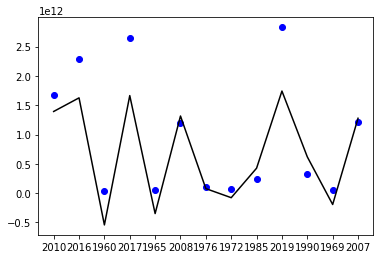

In [90]:
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

In [95]:
X2 = [int(i) for i in range(2022, 2050)]
y2 = [int(i) for i in range(2022, 2050)]
print(X2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.9, random_state=42)
X_test2 = np.array(X_test2)
y_pred2 = reg.predict(X_test2.reshape(-1,1))
print(y_pred2)

[2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049]
[[2.20587017e+12]
 [2.82524255e+12]
 [2.16715940e+12]
 [2.67039946e+12]
 [1.85747321e+12]
 [2.32200249e+12]
 [2.51555636e+12]
 [2.70911023e+12]
 [2.28329172e+12]
 [2.36071327e+12]
 [2.43813481e+12]
 [1.89618398e+12]
 [2.01231630e+12]
 [2.05102708e+12]
 [1.93489476e+12]
 [2.47684559e+12]
 [2.74782100e+12]
 [1.97360553e+12]
 [2.86395332e+12]
 [2.78653178e+12]
 [2.55426713e+12]
 [2.90266410e+12]
 [2.63168868e+12]
 [2.12844862e+12]
 [2.24458095e+12]
 [2.39942404e+12]]
